MEMO

* BFM\
  `./trained/bfm/2019-12-19/12-28-59/BFM_20.pt`\
  ~`./trained/stdout/bfm/2019-12-13-1746.txt`~\
  (`./trained/bfm/2019-12-24/18-25-19/BFM_16.pt`)
* Without L2 norm\
  `./trained/stdout/fabfm/2019-12-26-2047.txt`
* Layer Normalization without L2 norm\
  `./trained/fixed_abfm/2019-12-28/19-02-19`
* Layer Normalization with L2 norm(lmbda = 1e-05)\
  `./trained/fixed_abfm/2019-12-31/16-13-50`\
  `./trained/stdout/fabfm/2020-01-22-1707.txt`
 
 

## Sigmoid

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

## Loss Function

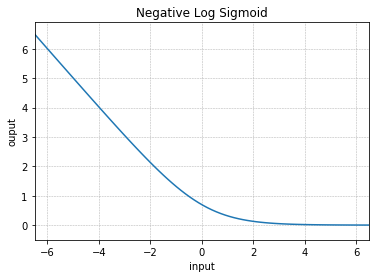

In [2]:
x = np.linspace(-7, 10, 100)
y  = -np.log(sigmoid(x))
plt.grid(linestyle='--', linewidth=0.5)
plt.xlim(-6.5, 6.5)
plt.ylim(-0.5, 6.9)
plt.xlabel("input")
plt.ylabel("ouput")
plt.title("Negative Log Sigmoid")
plt.plot(x, y)
plt.savefig("./img/neg_ln_sig.png", dpi=600)

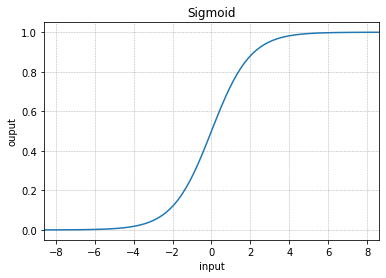

In [5]:
x = np.linspace(-10, 10, 100)
y  = sigmoid(x)
plt.grid(linestyle='--', linewidth=0.5)
plt.xlim(-8.6, 8.6)
plt.xlabel("input")
plt.ylabel("ouput")
plt.title("Sigmoid")
plt.plot(x, y)
plt.savefig("./img/sig.png", dpi=600)

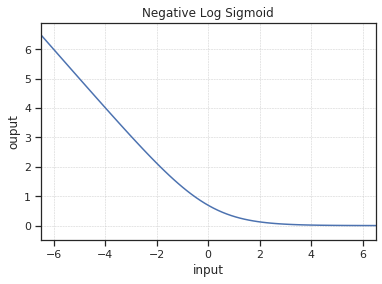

In [17]:
import seaborn as sns
sns.set(style="ticks")

x = np.linspace(-7, 10, 100)
y  = -np.log(sigmoid(x))
# plt.figure(dpi=600)
plt.grid(linestyle='--', linewidth=0.5)
plt.xlim(-6.5, 6.5)
plt.ylim(-0.5, 6.9)
plt.xlabel("input")
plt.ylabel("ouput")
plt.title("Negative Log Sigmoid")
plt.plot(x, y)

## Activation Function

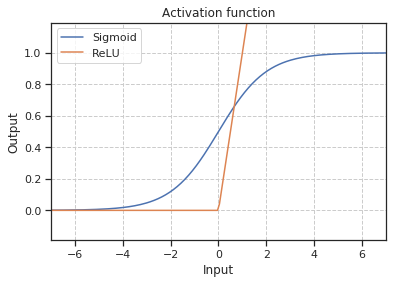

In [96]:
%matplotlib inline
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="ticks")

import torch
import torch.nn.functional as F

x = np.linspace(-8, 8, 200)
sig_y = F.sigmoid(torch.tensor(x, dtype=float))
relu_y = F.relu(torch.tensor(x, dtype=float))

plt.grid(linestyle='--', linewidth=1)
plt.xlim(-7, 7)
plt.ylim(-0.19, 1.19)
plt.title("Activation function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.plot(x, sig_y, label="Sigmoid")
plt.plot(x, relu_y, label="ReLU")
plt.legend(loc=0)
plt.savefig("./img/activation.png", format="png", dpi=600)

# 実験のまとめ

* EpochごとのLossの変化（TrainもTestも）
* 評価指標の変化も（TrainもTestも）

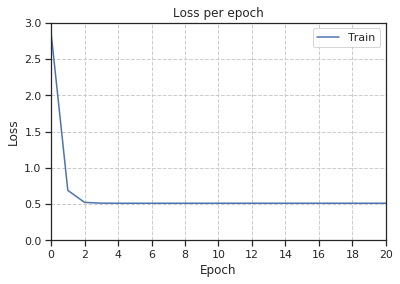

In [170]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv
sns.set(style="ticks")

with open("./for_graph/fabfm/graph_fabfm_2019-12-05-1437.txt") as f:
    y = [float(row[0]) for row in csv.reader(f, delimiter="\n")]
y = np.array(y)

x = np.linspace(0, 20, 21, dtype=int)
# plt.figure(dpi=600)
plt.grid(linestyle='--', linewidth=1)
plt.xlim(0, 20)
plt.xticks(range(0,21,2))
plt.ylim(0, 3)
plt.title("Loss per epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.plot(x, y, label="Train")
# plt.plot(x, y, label="Test")
plt.legend(loc=0)
plt.savefig("./img/layerNorm.png", format="png", dpi=600)

---

### Loss : fabfm_2019-12-05-1437

(20,) 
 [2.84438559 1.34206363 1.21373981 1.19755727 1.19360234 1.19196522
 1.19115466 1.19062836 1.19022349 1.18990397 1.18965621 1.18946257
 1.18930302 1.18917013 1.18905917 1.18896782 1.18889128 1.18882663
 1.18877287 1.18872768]
(20,) 
 [0.689011 0.523074 0.512394 0.51119  0.510996 0.51101  0.51109  0.511166
 0.511227 0.511278 0.511323 0.51136  0.511388 0.51141  0.511427 0.51144
 0.511449 0.511457 0.511463 0.511467]


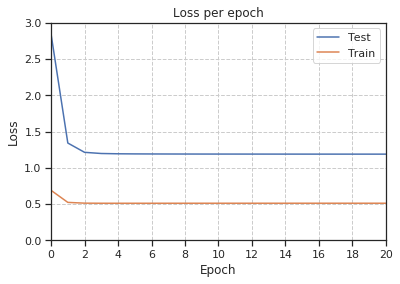

In [192]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv
sns.set(style="ticks")

test_idx = 4
train_idx = 97

with open("./for_graph/fabfm/metric_graph_fabfm_2020-12-05-1437.txt") as f:
    src = [row[0] for row in csv.reader(f, delimiter="\n")]
test_loss = list(map(float, src[test_idx:test_idx+20]))
train_loss = list(map(float, src[train_idx:train_idx+20]))
test_y = np.array(test_loss)
train_y = y[1:]
print(test_y.shape, "\n", test_y)
print(train_y.shape, "\n", train_y)

x = np.linspace(0, 21, 20, dtype=int)
plt.grid(linestyle='--', linewidth=1)
plt.xlim(0, 20)
plt.xticks(range(0,21,2))
plt.ylim(0, 3)
plt.title("Loss per epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.plot(x, test_y, label="Test")
plt.plot(x, train_y, label="Train")
plt.legend(loc=0)
plt.savefig("./img/loss_layerNorm.png", format="png", dpi=600)

### HLU : fabfm_2019-12-05-1437

(20,) 
 [0.04957788 0.04652557 0.05863638 0.10182606 1.34532889 1.4733701
 1.49005248 1.50064627 1.51035754 1.51166333 1.51057411 1.51046607
 1.51042522 1.51043386 1.5105801  1.51115045 1.51114217 1.51114398
 1.51114336 1.51114351]
(20,) 
 [ 0.43967986  0.44612619  0.52316     0.89841157 11.70737562 12.86708289
 13.0052375  13.04472047 13.05513291 13.02321771 13.02775189 13.04130046
 13.04324931 13.04298326 13.04327    13.04319708 13.04319718 13.04319913
 13.04320078 13.0431993 ]


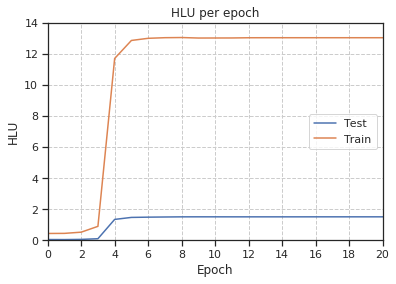

In [194]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv
sns.set(style="ticks")

test_idx = 27
train_idx = 120 

with open("./for_graph/fabfm/metric_graph_fabfm_2019-12-05-1437.txt") as f:
    src = [row[0] for row in csv.reader(f, delimiter="\n")]
test_loss = list(map(float, src[test_idx:test_idx+20]))
train_loss = list(map(float, src[train_idx:train_idx+20]))
test_y = np.array(test_loss)
train_y = np.array(train_loss)
print(test_y.shape, "\n", test_y)
print(train_y.shape, "\n", train_y)

x = np.linspace(0, 21, 20, dtype=int)
plt.grid(linestyle='--', linewidth=1)
plt.xlim(0, 20)
plt.xticks(range(0,21,2))
plt.ylim(0, 14)
plt.title("HLU per epoch")
plt.xlabel("Epoch")
plt.ylabel("HLU")

plt.plot(x, test_y, label="Test")
plt.plot(x, train_y, label="Train")
plt.legend(loc=0)
plt.savefig("./img/hlu_layerNorm.png", format="png", dpi=600)

### R@10 : fabfm_2019-12-05-1437

(20,) 
 [0.00087379 0.00082479 0.00110245 0.0014046  0.02079131 0.02338002
 0.02335552 0.02361684 0.02369034 0.0237475  0.02364134 0.02365767
 0.02363317 0.02363317 0.02363317 0.02363317 0.02363317 0.02363317
 0.02363317 0.02363317]
(20,) 
 [0.00704564 0.00752602 0.00915399 0.01214305 0.18027756 0.20688551
 0.20696557 0.20926074 0.20918068 0.20872698 0.20880705 0.20931412
 0.20928743 0.20928743 0.20928743 0.20928743 0.20928743 0.20928743
 0.20928743 0.20928743]


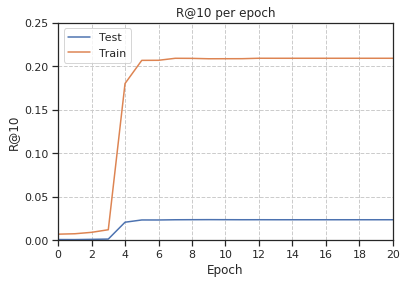

In [212]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv
sns.set(style="ticks")

test_idx = 50
train_idx = 143 

with open("./for_graph/fabfm/metric_graph_fabfm_2019-12-05-1437.txt") as f:
    src = [row[0] for row in csv.reader(f, delimiter="\n")]
test_loss = list(map(float, src[test_idx:test_idx+20]))
train_loss = list(map(float, src[train_idx:train_idx+20]))
test_y = np.array(test_loss)
train_y = np.array(train_loss)
print(test_y.shape, "\n", test_y)
print(train_y.shape, "\n", train_y)

x = np.linspace(0, 21, 20, dtype=int)
plt.grid(linestyle='--', linewidth=1)
plt.xlim(0, 20)
plt.xticks(range(0,21,2))
plt.ylim(0, 0.25)
plt.title("R@10 per epoch")
plt.xlabel("Epoch")
plt.ylabel("R@10")

plt.plot(x, test_y, label="Test")
plt.plot(x, train_y, label="Train")
plt.legend(loc=0)
plt.savefig("./img/r@10_layerNorm.png", format="png", dpi=600)

### AUC : fabfm_2019-12-05-1437

(20,) 
 [0.53874763 0.71359725 0.88522054 0.95367482 0.97096288 0.97409977
 0.97456631 0.97461552 0.97460548 0.97458786 0.97457205 0.97455929
 0.97454875 0.97453983 0.97453258 0.9745265  0.9745214  0.97451708
 0.97451341 0.97451034]
(20,) 
 [0.54007952 0.71294488 0.88310655 0.95246322 0.97059395 0.97407908
 0.9746242  0.97469161 0.97468644 0.97467109 0.97465608 0.97464347
 0.97463279 0.97462356 0.97461584 0.97460937 0.97460393 0.97459935
 0.97459547 0.97459221]


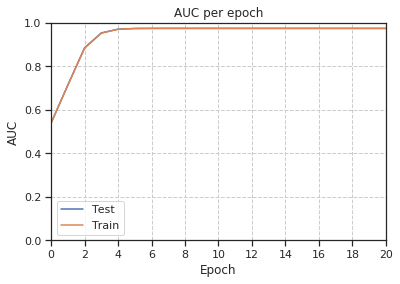

In [244]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv
sns.set(style="ticks")

test_idx = 73 
train_idx = 166 

with open("./for_graph/fabfm/metric_graph_fabfm_2019-12-05-1437.txt") as f:
    src = [row[0] for row in csv.reader(f, delimiter="\n")]
test_loss = list(map(float, src[test_idx:test_idx+20]))
train_loss = list(map(float, src[train_idx:train_idx+20]))
test_y = np.array(test_loss)
train_y = np.array(train_loss)
print(test_y.shape, "\n", test_y)
print(train_y.shape, "\n", train_y)

x = np.linspace(0, 21, 20, dtype=int)
plt.grid(linestyle='--', linewidth=1)
plt.xlim(0, 20)
plt.xticks(range(0,21,2))
plt.ylim(0, 1)
plt.title("AUC per epoch")
plt.xlabel("Epoch")
plt.ylabel("AUC")

plt.plot(x, test_y, label="Test")
plt.plot(x, train_y, label="Train")
plt.legend(loc=0)
plt.savefig("./img/AUC_layerNorm.png", format="png", dpi=600)

---

### Loss : 

Disable L2 norm `./trained/stdout/fabfm/2019-12-26-2047.txt`

[2.84438559 1.34206363 1.21373981 1.19755727 1.19360234 1.19196522
 1.19115466 1.19062836 1.19022349 1.18990397 1.18965621 1.18946257
 1.18930302 1.18917013 1.18905917 1.18896782 1.18889128 1.18882663
 1.18877287 1.18872768]
[0.689011 0.523074 0.512394 0.51119  0.510996 0.51101  0.51109  0.511166
 0.511227 0.511278 0.511323 0.51136  0.511388 0.51141  0.511427 0.51144
 0.511449 0.511457 0.511463 0.511467]


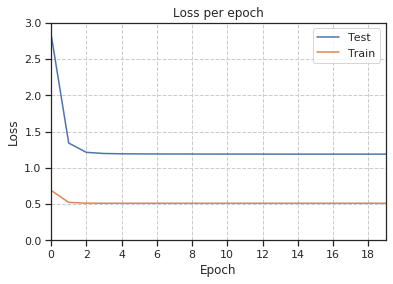

In [193]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv
sns.set(style="ticks")

test_idx = 2
# train_idx = 115 

with open("./for_graph/fabfm/graph_2019-12-05_metric_fbfm_test.txt") as f:
    src = [row[0] for row in csv.reader(f, delimiter="\n")]
test_loss = list(map(float, src[test_idx:test_idx+20]))
# train_loss = list(map(float, src[train_idx:train_idx+20]))
test_y = np.array(test_loss)
# train_y = np.array(train_loss)
print(test_y)
print(train_y)

x = np.linspace(0, 19, 20, dtype=int)
plt.grid(linestyle='--', linewidth=1)
plt.xlim(0, 19)
plt.xticks(range(0,20,2))
plt.ylim(0, 3)
plt.title("Loss per epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.plot(x, test_y, label="Test")
plt.plot(x, train_y, label="Train")
plt.legend(loc=0)
plt.savefig("./img/loss2_layerNorm.png", format="png", dpi=600)

### HLU : fabfm_2019-

(20,) 
 [0.00379922 0.03190449 0.02136129 0.01141241 0.00756627 0.00613939
 0.00513723 0.00368464 0.00264983 0.00221242 0.00378558 0.00363576
 0.00367764 0.00389667 0.00384533 0.0038638  0.00380729 0.00379922
 0.0037992  0.00379907]
(20,) 
 [0.54007952 0.71294488 0.88310655 0.95246322 0.97059395 0.97407908
 0.9746242  0.97469161 0.97468644 0.97467109 0.97465608 0.97464347
 0.97463279 0.97462356 0.97461584 0.97460937 0.97460393 0.97459935
 0.97459547 0.97459221]


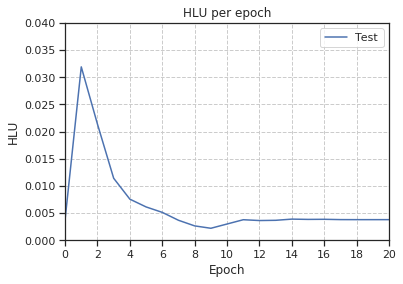

In [242]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv
sns.set(style="ticks")

test_idx = 24
# train_idx = 115 

with open("./for_graph/fabfm/graph_2019-12-05_metric_fbfm_test.txt") as f:
    src = [row[0] for row in csv.reader(f, delimiter="\n")]
test_loss = list(map(float, src[test_idx:test_idx+20]))
# train_loss = list(map(float, src[train_idx:train_idx+20]))
test_y = np.array(test_loss)
# train_y = np.array(train_loss)
print(test_y.shape, "\n", test_y)
print(train_y.shape, "\n", train_y)

x = np.linspace(0, 21, 20, dtype=int)
plt.grid(linestyle='--', linewidth=1)
plt.xlim(0, 20)
plt.xticks(range(0,21,2))
plt.ylim(0, 0.04)
plt.title("HLU per epoch")
plt.xlabel("Epoch")
plt.ylabel("HLU")

plt.subplots_adjust(left=0.15)
plt.plot(x, test_y, label="Test")
plt.legend(loc=0)
plt.savefig("./img/hlu2_test.png", format="png", dpi=600)

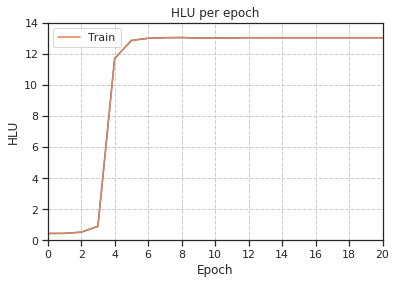

In [210]:
x = np.linspace(0, 21, 20, dtype=int)
plt.grid(linestyle='--', linewidth=1)
plt.xlim(0, 20)
plt.xticks(range(0,21,2))
plt.ylim(0, 14)
plt.title("HLU per epoch")
plt.xlabel("Epoch")
plt.ylabel("HLU")

# cmap = plt.get_cmap("tab10") 
plt.plot(x, train_y)
plt.plot(x, train_y, label="Train")
plt.legend(loc=0)
plt.savefig("./img/hlu2_train.png", format="png", dpi=600)

### R@10 : fabfm_2019-

(20,) 
 [6.53301213e-05 6.53301213e-05 5.30807235e-04 3.91980728e-04
 1.79657833e-04 1.14327712e-04 1.06161447e-04 1.14327712e-04
 6.53301213e-05 4.89975910e-05 3.26650606e-05 7.34963864e-05
 6.53301213e-05 5.71638561e-05 6.53301213e-05 6.53301213e-05
 6.53301213e-05 6.53301213e-05 6.53301213e-05 6.53301213e-05]
(20,) 
 [0.54007952 0.71294488 0.88310655 0.95246322 0.97059395 0.97407908
 0.9746242  0.97469161 0.97468644 0.97467109 0.97465608 0.97464347
 0.97463279 0.97462356 0.97461584 0.97460937 0.97460393 0.97459935
 0.97459547 0.97459221]


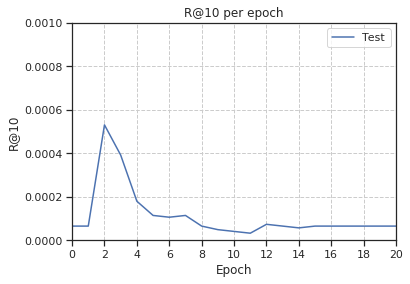

In [241]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv
sns.set(style="ticks")

test_idx = 46
# train_idx = 137 

with open("./for_graph/fabfm/graph_2019-12-05_metric_fbfm_test.txt") as f:
    src = [row[0] for row in csv.reader(f, delimiter="\n")]
test_loss = list(map(float, src[test_idx:test_idx+20]))
# train_loss = list(map(float, src[train_idx:train_idx+20]))
test_y = np.array(test_loss)
# train_y = np.array(train_loss)
print(test_y.shape, "\n", test_y)
print(train_y.shape, "\n", train_y)

x = np.linspace(0, 21, 20, dtype=int)
plt.grid(linestyle='--', linewidth=1)
plt.xlim(0, 20)
plt.xticks(range(0,21,2))
plt.ylim(0, 1e-3)
plt.title("R@10 per epoch")
plt.xlabel("Epoch")
plt.ylabel("R@10")

# plt.subplots_adjust(left=10, right=1, bottom=0, top=1)
plt.subplots_adjust(left=0.15)
plt.plot(x, test_y, label="Test")
plt.legend(loc=0)
plt.savefig("./img/r@10_2_test.png", format="png", dpi=600)

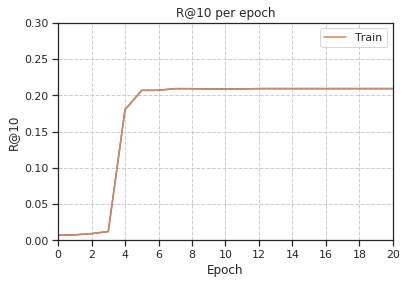

In [225]:
x = np.linspace(0, 21, 20, dtype=int)
plt.grid(linestyle='--', linewidth=1)
plt.xlim(0, 20)
plt.xticks(range(0,21,2))
plt.ylim(0, 0.3)
plt.title("R@10 per epoch")
plt.xlabel("Epoch")
plt.ylabel("R@10")

# cmap = plt.get_cmap("tab10") 
plt.plot(x, train_y)
plt.plot(x, train_y, label="Train")
plt.legend(loc=0)
plt.savefig("./img/r@10_2_train.png", format="png", dpi=600)

### AUC : fabfm_2019-

(20,) 
 [0.97451034 0.97450775 0.53874763 0.71359725 0.88522054 0.95367482
 0.97096288 0.97409977 0.97456631 0.97461552 0.97460548 0.97458786
 0.97457205 0.97455929 0.97454875 0.97453983 0.97453258 0.9745265
 0.9745214  0.97451708]
(20,) 
 [0.54007952 0.71294488 0.88310655 0.95246322 0.97059395 0.97407908
 0.9746242  0.97469161 0.97468644 0.97467109 0.97465608 0.97464347
 0.97463279 0.97462356 0.97461584 0.97460937 0.97460393 0.97459935
 0.97459547 0.97459221]


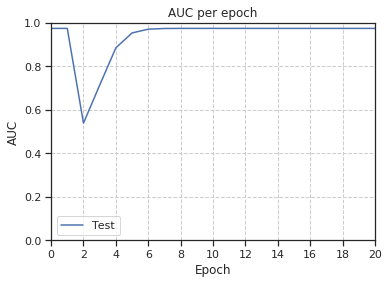

In [245]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv
sns.set(style="ticks")

test_idx = 68
# train_idx = 137 

with open("./for_graph/fabfm/graph_2019-12-05_metric_fbfm_test.txt") as f:
    src = [row[0] for row in csv.reader(f, delimiter="\n")]
test_loss = list(map(float, src[test_idx:test_idx+20]))
# train_loss = list(map(float, src[train_idx:train_idx+20]))
test_y = np.array(test_loss)
# train_y = np.array(train_loss)
print(test_y.shape, "\n", test_y)
print(train_y.shape, "\n", train_y)

x = np.linspace(0, 21, 20, dtype=int)
plt.grid(linestyle='--', linewidth=1)
plt.xlim(0, 20)
plt.xticks(range(0,21,2))
plt.ylim(0, 1)
plt.title("AUC per epoch")
plt.xlabel("Epoch")
plt.ylabel("AUC")

plt.subplots_adjust(left=0.15)
plt.plot(x, test_y, label="Test")
plt.legend(loc=0)
plt.savefig("./img/auc_2_test.png", format="png", dpi=600)

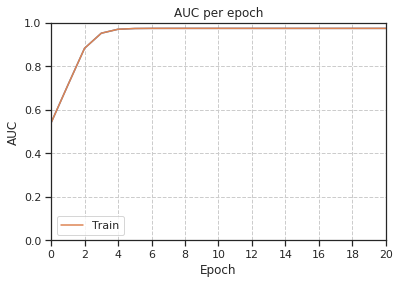

In [246]:
x = np.linspace(0, 21, 20, dtype=int)
plt.grid(linestyle='--', linewidth=1)
plt.xlim(0, 20)
plt.xticks(range(0,21,2))
plt.ylim(0, 1)
plt.title("AUC per epoch")
plt.xlabel("Epoch")
plt.ylabel("AUC")

# cmap = plt.get_cmap("tab10") 
plt.plot(x, train_y)
plt.plot(x, train_y, label="Train")
plt.legend(loc=0)
plt.savefig("./img/auc_2_train.png", format="png", dpi=600)

---

### Loss : bfm_2020-02-02-2309

(21,) 
 [0.434867 0.432054 0.432029 0.432063 0.431939 0.431928 0.432123 0.431568
 0.432033 0.431828 0.431878 0.431635 0.431967 0.431977 0.431892 0.432133
 0.431732 0.431803 0.431842 0.431817 0.431854]


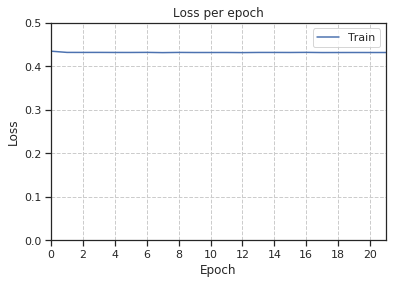

In [185]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv
sns.set(style="ticks")

with open("./for_graph/bfm/2020-02-02-2309.txt") as f:
    src = [row[0] for row in csv.reader(f, delimiter="\n")]
train_loss = list(map(float, src))
train_y = np.array(train_loss)
print(train_y.shape, "\n", train_y)

"""
test_idx = 4
train_idx = 97
with open("./for_graph/bfm/2020-02-02-2309.txt") as f:
    src = [row[0] for row in csv.reader(f, delimiter="\n")]
test_loss = list(map(float, src[test_idx:test_idx+20]))
train_loss = list(map(float, src[train_idx:train_idx+20]))
test_y = np.array(test_loss)
train_y = y[1:]
print(test_y.shape, "\n", test_y)
print(train_y.shape, "\n", train_y)
"""

x = np.linspace(0, 22, 21, dtype=int)
plt.grid(linestyle='--', linewidth=1)
plt.xlim(0, 21)
plt.xticks(range(0,22,2))
plt.ylim(0, 0.5)
plt.title("Loss per epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")

# plt.plot(x, test_y, label="Test")
plt.plot(x, train_y, label="Train")
plt.legend(loc=0)
plt.savefig("./img/bfm/loss.png", format="png", dpi=600)

(20,) 
 [13.572443  5.900917  3.1783    2.000766  1.388188  1.0253    0.78856
  0.625257  0.50703   0.419787  0.351245  0.297218  0.253938  0.218392
  0.188779  0.164041  0.142856  0.124867  0.109025  0.095745]
(20,) 
 [0.689011 0.523074 0.512394 0.51119  0.510996 0.51101  0.51109  0.511166
 0.511227 0.511278 0.511323 0.51136  0.511388 0.51141  0.511427 0.51144
 0.511449 0.511457 0.511463 0.511467]


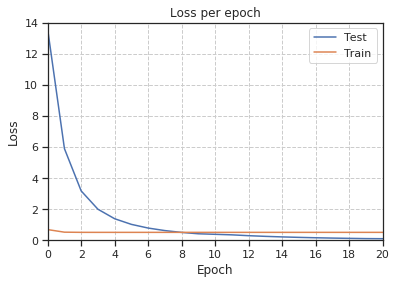

In [248]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv
sns.set(style="ticks")

test_idx = 0
train_idx = 0

with open("./for_graph/fabfm/2020-01-22.txt") as f:
    src = [row[0] for row in csv.reader(f, delimiter="\n")]
test_loss = list(map(float, src[test_idx:test_idx+20]))
train_loss = list(map(float, src[train_idx:train_idx+20]))
test_y = np.array(test_loss)
train_y = y[1:]
print(test_y.shape, "\n", test_y)
print(train_y.shape, "\n", train_y)

x = np.linspace(0, 21, 20, dtype=int)
plt.grid(linestyle='--', linewidth=1)
plt.xlim(0, 20)
plt.xticks(range(0,21,2))
plt.ylim(0, 14)
plt.title("Loss per epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.plot(x, test_y, label="Test")
plt.plot(x, train_y, label="Train")
plt.legend(loc=0)
plt.savefig("./img/loss_layerNorm.png", format="png", dpi=600)